In [26]:
#sciezka z danymi
%cd "C:\Users\Dawid\Desktop\kurs\jdszr4-animalsi\wino"

C:\Users\Dawid\Desktop\kurs\jdszr4-animalsi\wino


In [27]:
from sklearn.metrics import *
import sklearn 
import pickle
import matplotlib.pyplot as plt
#wlasny modul
from dane.dane_wsadowe_zmiana_klas import *

**1. Pobranie modeli**

In [28]:
#random forrest
with open("modele/model_final_rf.pkl", "rb") as file:
    model_rf = pickle.load(file)

In [29]:
#XGboost
with open("modele/model_final_xgb.pkl", "rb") as file:
    model_xgb = pickle.load(file)

In [30]:
#knn
with open("modele/Wine_Quality_Model_KNN.pkl", "rb") as file:
    model_knn = pickle.load(file)
    

C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [31]:
#logistic regression
with open("modele/model_logreg.pkl", "rb") as file:
    model_lr= pickle.load(file)

C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


**2. Trenowanie wszystkich modeli**

In [32]:
lista_modeli = [model_rf, model_xgb,model_lr]

#model_knn trzeba inaczej porownac

#progi na ktorych dzialaja najlepiej
progi = {"RandomForestClassifier" : 0.45862068965517244,
        "XGBClassifier" : 0.3206896551724138,
         "LogisticRegression": 0.5}

#jakie zbiory wykorzystalismy do trenowania
zbior = {"RandomForestClassifier" : X_test,
        "XGBClassifier" :X_test_scaled,
        "LogisticRegression": X_test}


In [33]:
for i in lista_modeli:
    prog = progi[type(i).__name__]
    dane = zbior[type(i).__name__]
    Y_pred_model = (i.predict_proba(dane)[:,1] >= prog).astype(int)+1
    cnf_matrix = confusion_matrix(Y_test, Y_pred_model)
    cnf_raport = classification_report(Y_test, Y_pred_model)
    print(type(i).__name__, "\n", cnf_raport)    

RandomForestClassifier 
               precision    recall  f1-score   support

           1       0.96      0.91      0.93       280
           2       0.53      0.70      0.60        40

    accuracy                           0.88       320
   macro avg       0.74      0.81      0.77       320
weighted avg       0.90      0.88      0.89       320

XGBClassifier 
               precision    recall  f1-score   support

           1       0.95      0.95      0.95       280
           2       0.66      0.62      0.64        40

    accuracy                           0.91       320
   macro avg       0.80      0.79      0.80       320
weighted avg       0.91      0.91      0.91       320

LogisticRegression 
               precision    recall  f1-score   support

           1       0.89      0.96      0.93       280
           2       0.44      0.20      0.28        40

    accuracy                           0.87       320
   macro avg       0.67      0.58      0.60       320
weighted avg

In [43]:
#model KNN został wyliczony na danych bez zmiennej pH

X_bez_pH = np.delete(X_test_scaled, 8,axis=1)

Y_pred_model_knn = model_knn.predict(X_bez_pH)
cnf_matrix_knn = confusion_matrix(Y_test, Y_pred_model_knn)
cnf_raport_knn = classification_report(Y_test, Y_pred_model_knn)
print(cnf_raport_knn)
print(cnf_matrix_knn)

              precision    recall  f1-score   support

           1       0.93      0.96      0.94       280
           2       0.61      0.47      0.54        40

    accuracy                           0.90       320
   macro avg       0.77      0.72      0.74       320
weighted avg       0.89      0.90      0.89       320

[[268  12]
 [ 21  19]]


Jak widzimy najlepsze rezultaty osiągnęliśmy wykorzystując model XGboost.

RandomForestClassifier


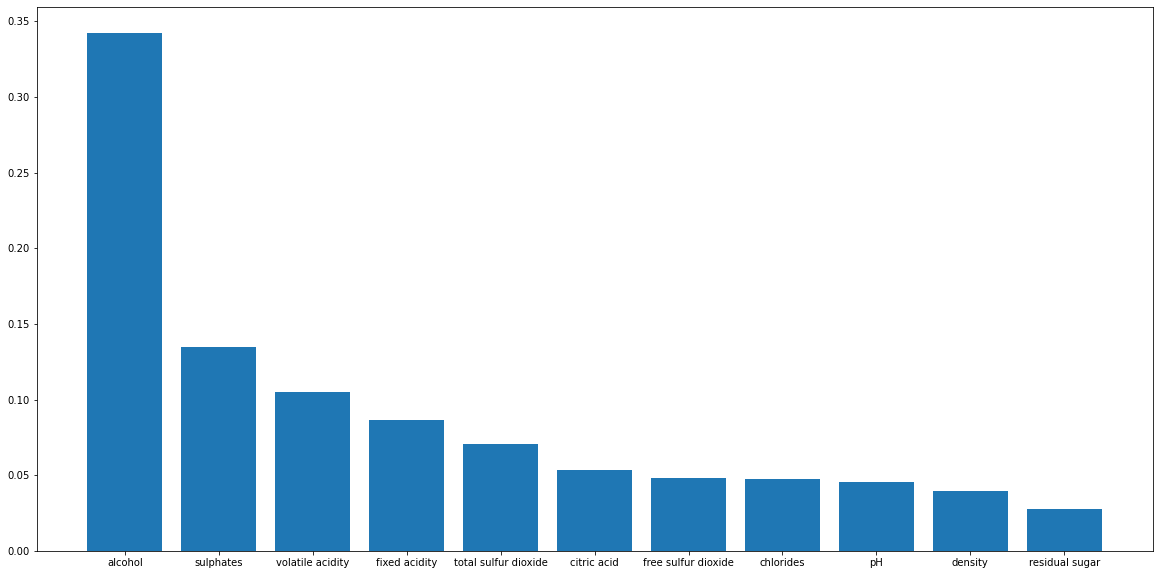

features with impact less than 0.05: 
                 zmienna   wartosc
6   free sulfur dioxide  0.047959
7             chlorides  0.047355
8                    pH  0.045265
9               density  0.039325
10       residual sugar  0.027714 

XGBClassifier


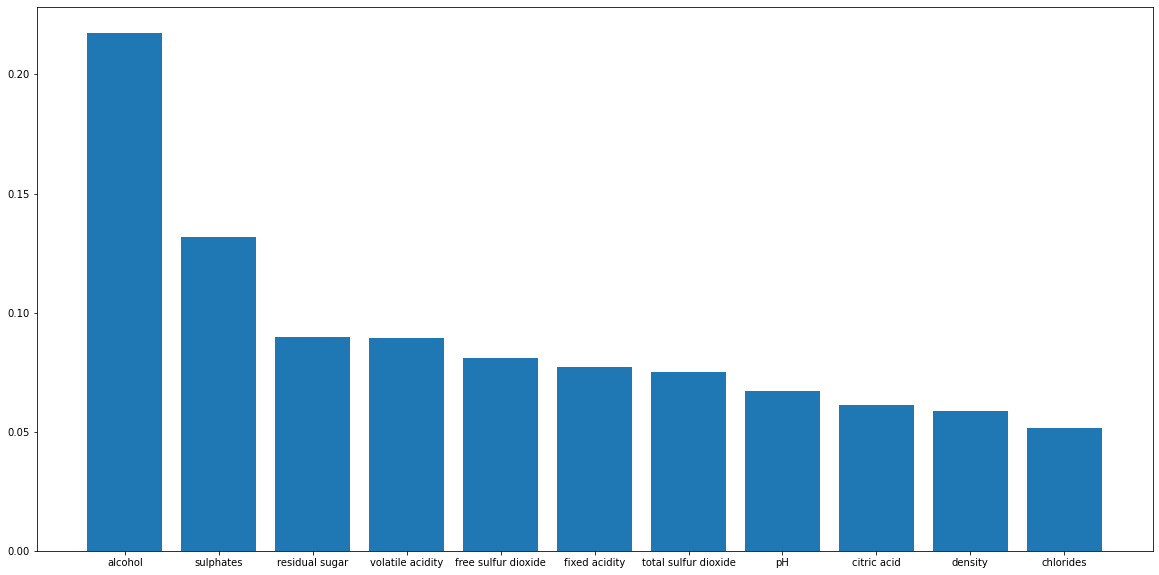

features with impact less than 0.05: 
 Empty DataFrame
Columns: [zmienna, wartosc]
Index: [] 

LogisticRegression


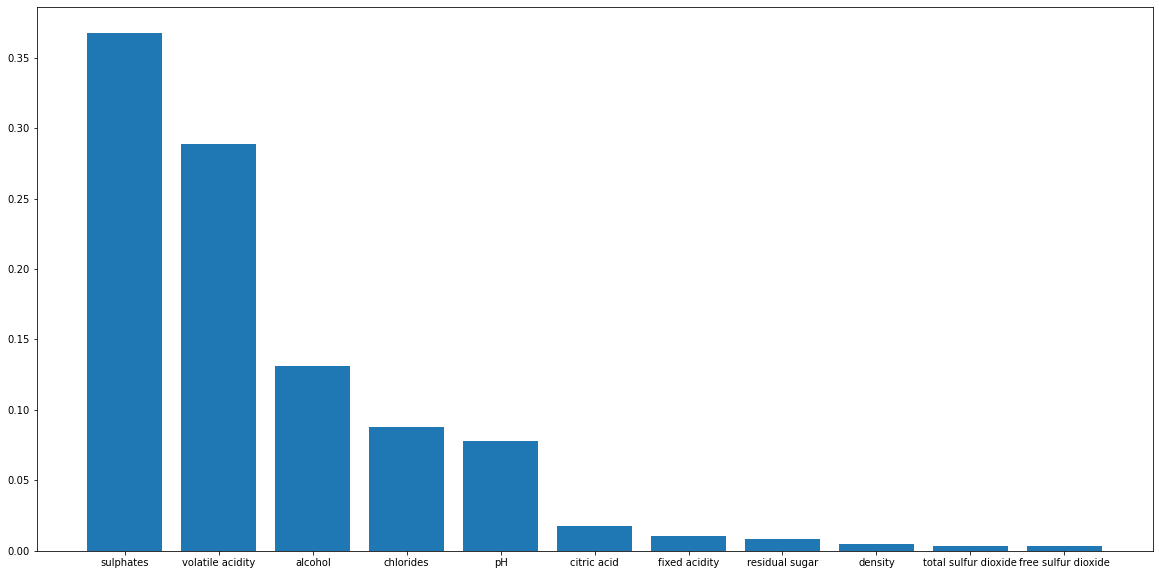

features with impact less than 0.05: 
                  zmienna   wartosc
5            citric acid  0.017726
6          fixed acidity  0.010442
7         residual sugar  0.008180
8                density  0.004854
9   total sulfur dioxide  0.003157
10   free sulfur dioxide  0.003086 



In [35]:
#sprawdzmy jakie zmienne sa najmniej istotne do przewidywania modelu i je mozemy pominac przy narzedziu
for i in lista_modeli:
    if i != model_lr:
        df = pd.DataFrame({"zmienna" :X.columns,"wartosc" : i.feature_importances_ }).sort_values(by = "wartosc", ascending = False).reset_index(drop = True)
    else:
         df = pd.DataFrame({"zmienna" :X.columns,"wartosc" : (np.abs(i.coef_)/(np.abs(i.coef_)).sum()).flatten()}).sort_values(by = "wartosc", ascending = False).reset_index(drop = True)
    print(type(i).__name__)
    plt.figure(figsize=(20,10))
    plt.bar(df.zmienna, df.wartosc)
    plt.show()
    print("features with impact less than 0.05:", "\n",df[df.wartosc<0.05], "\n")

Dla naszego modelu, trudno jest wykluczyć jakiekolwiek zmienne, bo każda ma wpływ powyzej 5%

In [44]:
#w tym miejscu wczytuje model recznie, bo piklowany daje nierzetelne wyniki.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
X_train_bez_pH = np.delete(X_train_all_scaled, 8,axis=1)


model_knn = KNeighborsClassifier(n_neighbors=12, n_jobs=-1, metric='euclidean', weights='distance').fit(X_train_bez_pH, Y_train_all)